In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [13]:
# Separate the majority and minority classes
majority_class = data[data['Class'] == 0]
minority_class = data[data['Class'] == 1]

In [14]:
# Upsample the minority class
minority_upsampled = minority_class.sample(len(majority_class), replace=True, random_state=42)


In [15]:
# Combine the majority class with the upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])


In [16]:
# Shuffle the dataset
upsampled_data = upsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [24]:
# Split the data into features and target variable
X = upsampled_data.drop('Class', axis=1)  # Features
y = upsampled_data['Class']  # Target variable

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
# Initialize the Decision Tree Classifier with max_depth
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can adjust max_depth as needed


In [35]:
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
# Make predictions
y_pred = dt_classifier.predict(X_test)

In [37]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[55556  1307]
 [ 2667 54196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



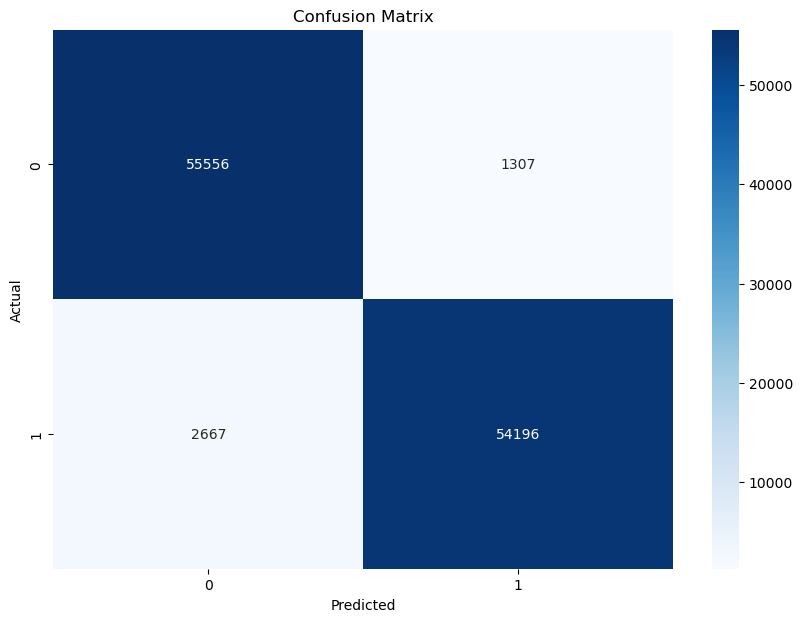

In [38]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
# Predicting on new data (Example)
# Let's say you have a new transaction data point (replace with actual values)
# Ensure to include all features used during training, including 'Time'
new_transaction = pd.DataFrame({
    'Time': [0],  # Replace with actual value
    'V1': [0.1],  # Replace with actual value
    'V2': [0.2],  # Replace with actual value
    'V3': [0.3],  # Replace with actual value
    'V4': [0.4],  # Replace with actual value
    'V5': [0.5],  # Replace with actual value
    'V6': [0.6],  # Replace with actual value
    'V7': [0.7],  # Replace with actual value
    'V8': [0.8],  # Replace with actual value
    'V9': [0.9],  # Replace with actual value
    'V10': [0.0],  # Replace with actual value
    'V11': [0.1],  # Replace with actual value
    'V12': [0.2],  # Replace with actual value
    'V13': [0.3],  # Replace with actual value
    'V14': [0.4],  # Replace with actual value
    'V15': [0.5],  # Replace with actual value
    'V16': [0.6],  # Replace with actual value
    'V17': [0.7],  # Replace with actual value
    'V18': [0.8],  # Replace with actual value
    'V19': [0.9],  # Replace with actual value
    'V20': [1.0],  # Replace with actual value
    'V21': [0.0],  # Replace with actual value
    'V22': [0.0],  # Replace with actual value
    'V23': [0.0],  # Replace with actual value
    'V24': [0.0],  # Replace with actual value
    'V25': [0.0],  # Replace with actual value
    'V26': [0.0],  # Replace with actual value
    'V27': [0.0],  # Replace with actual value
    'V28': [0.0],  # Replace with actual value
    'Amount': [100.0]  # Replace with actual value
})

# Predict whether the new transaction is fraudulent or not
predicted_class = dt_classifier.predict(new_transaction)
print("\nPredicted Class for the new transaction (0 = Legitimate, 1 = Fraudulent):", predicted_class[0])



Predicted Class for the new transaction (0 = Legitimate, 1 = Fraudulent): 0
